In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
X = iris['data']
y = iris['target']

In [6]:
X.shape

(150, 4)

In [8]:
y.shape

(150,)

In [22]:
# standarize data
mean = np.mean(X, axis=0)
stdev = np.std(X, axis=0)
X = (X - mean) / stdev

In [23]:
# covarience matrix
cov_mat = np.cov(X.T)
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [25]:
# eigenvalues & eigenvectors of covarience matrix
eigval, eigvec = np.linalg.eig(cov_mat)
eigvec = eigvec.T

In [26]:
# sort eigenvalues & eigenvectors in decreasing order
idx = np.argsort(eigval)[::-1]
eigval = eigval[idx]
eigvec = eigvec[idx]

In [27]:
eigval

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [28]:
eigvec

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [-0.37741762, -0.92329566, -0.02449161, -0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [ 0.26128628, -0.12350962, -0.80144925,  0.52359713]])

In [29]:
# choose principal components
k = 2
comp = eigvec[:k]
comp.shape

(2, 4)

In [30]:
# transform into k-dimensions
X_new = X.dot(comp.T)
X_new.shape

(150, 2)

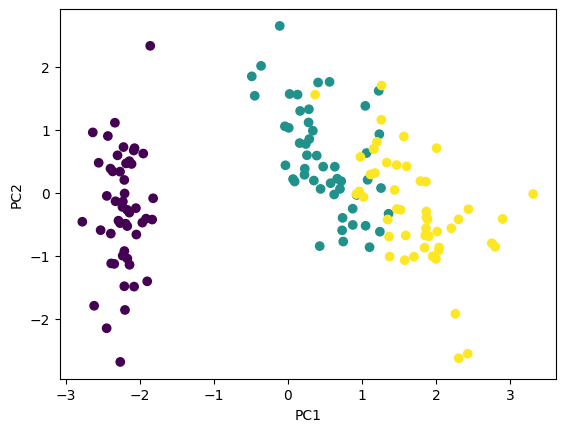

In [31]:
plt.scatter(X_new[:, 0], X_new[:, 1], c = y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Explained variance: [72.96 22.85  3.67  0.52]
Cumulative explained variance: [ 72.96  95.81  99.48 100.  ]


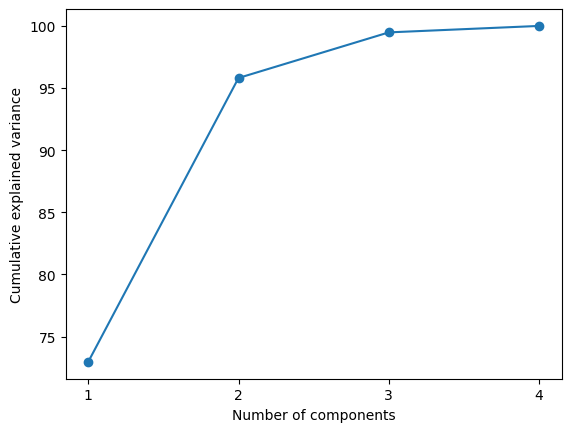

In [32]:
eigval_total = sum(eigval)
explained_variance = [(i / eigval_total)*100 for i in eigval]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

plt.plot(np.arange(1,X.shape[1]+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1,X.shape[1]+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()